In [31]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [33]:
#用一个4个卷积层加2个全连接层的典型CNN网络来进行分类，和助教给的模型一致
#构建模型,在Sequential初始化的时候按数组一个一个写进去就可以了
model = Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64,(3,3),padding='same',activation='relu'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')    
])

model.summary()
#指定优化函数的参数
opt = keras.optimizers.rmsprop(lr=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [34]:
#为了模型更快的收敛以及更好的泛化性能,生成了一个数据增强器，
#包含了范围20°内的随机旋转，±15%的缩放以及随机的水平翻转
datagen = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.15,
    horizontal_flip = True,
)

In [38]:
#未进行标准化
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#通过ImageDataGenerator生成的数据需要使用model的fit_generator方法来进行训练，其中的workers参数表示多线程运算
history1=model.fit_generator(datagen.flow(x_train,y_train,batch_size=64),steps_per_epoch = 100,epochs = 20,
                    validation_data=(x_test,y_test),workers=4,verbose=1)


Epoch 1/20
100/100 [==============================] - 15s 149ms/step - loss: 10.0807 - accuracy: 0.3952 - val_loss: 1.9246 - val_accuracy: 0.4392
Epoch 2/20
100/100 [==============================] - 13s 127ms/step - loss: 2.1280 - accuracy: 0.3512 - val_loss: 1.6004 - val_accuracy: 0.4472
Epoch 3/20
100/100 [==============================] - 9s 94ms/step - loss: 1.7839 - accuracy: 0.3792 - val_loss: 1.5671 - val_accuracy: 0.4450
Epoch 4/20
100/100 [==============================] - 9s 94ms/step - loss: 1.6716 - accuracy: 0.4019 - val_loss: 1.4650 - val_accuracy: 0.4845
Epoch 5/20
100/100 [==============================] - 13s 129ms/step - loss: 1.6498 - accuracy: 0.4161 - val_loss: 1.6268 - val_accuracy: 0.4441
Epoch 6/20
100/100 [==============================] - 13s 132ms/step - loss: 1.6047 - accuracy: 0.4380 - val_loss: 1.4320 - val_accuracy: 0.4908
Epoch 7/20
100/100 [==============================] - 10s 96ms/step - loss: 1.5854 - accuracy: 0.4381 - val_loss: 1.4788 - val_accura

In [46]:
#进行归一化
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
xtrain_max=np.max(x_train)
xtrain_min=np.min(x_train)
xtest_max=np.max(x_test)
xtest_min=np.min(x_test)
x_train = (x_train.astype('float32')-xtrain_min)/(xtrain_max-xtrain_min)
x_test = (x_test.astype('float32')-xtest_min)/(xtest_max-xtest_min)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#通过ImageDataGenerator生成的数据需要使用model的fit_generator方法来进行训练，其中的workers参数表示多线程运算
history2=model.fit_generator(datagen.flow(x_train,y_train,batch_size=64),steps_per_epoch = 100,epochs = 20,
                    validation_data=(x_test,y_test),workers=4,verbose=1)

Epoch 1/20
100/100 [==============================] - 14s 142ms/step - loss: 1.3396 - accuracy: 0.5330 - val_loss: 1.0546 - val_accuracy: 0.6276
Epoch 2/20
100/100 [==============================] - 9s 95ms/step - loss: 1.1571 - accuracy: 0.5938 - val_loss: 1.0336 - val_accuracy: 0.6403
Epoch 3/20
100/100 [==============================] - 10s 95ms/step - loss: 1.1607 - accuracy: 0.5909 - val_loss: 1.0517 - val_accuracy: 0.6277
Epoch 4/20
100/100 [==============================] - 10s 97ms/step - loss: 1.1168 - accuracy: 0.6080 - val_loss: 1.0464 - val_accuracy: 0.6291
Epoch 5/20
100/100 [==============================] - 9s 94ms/step - loss: 1.1224 - accuracy: 0.6004 - val_loss: 1.0200 - val_accuracy: 0.6397
Epoch 6/20
100/100 [==============================] - 10s 97ms/step - loss: 1.1344 - accuracy: 0.5989 - val_loss: 1.0749 - val_accuracy: 0.6262
Epoch 7/20
100/100 [==============================] - 11s 111ms/step - loss: 1.1003 - accuracy: 0.6197 - val_loss: 0.9857 - val_accuracy:

In [43]:
#进行标准化
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
num_classes=10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#通过ImageDataGenerator生成的数据需要使用model的fit_generator方法来进行训练，其中的workers参数表示多线程运算
history3=model.fit_generator(datagen.flow(x_train,y_train,batch_size=64),steps_per_epoch = 100,epochs = 20,
                    validation_data=(x_test,y_test),workers=4,verbose=1)

Epoch 1/20
100/100 [==============================] - 14s 143ms/step - loss: 1.4807 - accuracy: 0.5206 - val_loss: 1.1304 - val_accuracy: 0.5984
Epoch 2/20
100/100 [==============================] - 10s 100ms/step - loss: 1.2158 - accuracy: 0.5770 - val_loss: 1.0851 - val_accuracy: 0.6153
Epoch 3/20
100/100 [==============================] - 9s 94ms/step - loss: 1.2093 - accuracy: 0.5735 - val_loss: 1.1082 - val_accuracy: 0.6093
Epoch 4/20
100/100 [==============================] - 9s 95ms/step - loss: 1.1932 - accuracy: 0.5786 - val_loss: 1.0623 - val_accuracy: 0.6260
Epoch 5/20
100/100 [==============================] - 9s 94ms/step - loss: 1.1789 - accuracy: 0.5855 - val_loss: 1.1075 - val_accuracy: 0.6100
Epoch 6/20
100/100 [==============================] - 10s 99ms/step - loss: 1.1754 - accuracy: 0.5797 - val_loss: 1.0928 - val_accuracy: 0.6156
Epoch 7/20
100/100 [==============================] - 10s 104ms/step - loss: 1.1671 - accuracy: 0.5895 - val_loss: 1.1306 - val_accuracy:

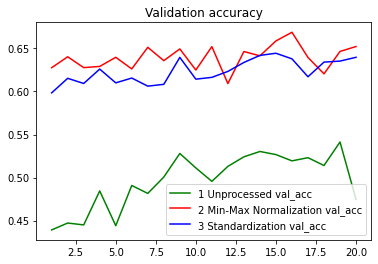

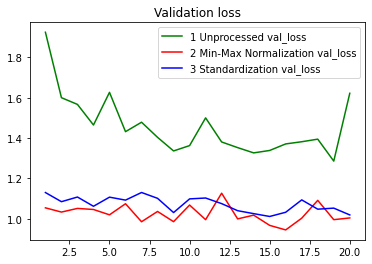

In [47]:
import matplotlib
import matplotlib.pyplot as plt
acc1 = history1.history['val_accuracy']
acc2 = history2.history['val_accuracy']
acc3 = history3.history['val_accuracy']
loss1 = history1.history['val_loss']
loss2 = history2.history['val_loss']
loss3 = history3.history['val_loss']

# 绘图
epochs = range(1, len(acc1)+1)
plt.plot(epochs, acc1, 'g', label = '1 Unprocessed val_acc')
plt.plot(epochs, acc2, 'r', label = '2 Min-Max Normalization val_acc')
plt.plot(epochs, acc3, 'b', label = '3 Standardization val_acc')
plt.title('Validation accuracy')
plt.legend()
plt.savefig("accuracy.png")
plt.figure()
plt.plot(epochs, loss1, 'g', label =  '1 Unprocessed val_loss')
plt.plot(epochs, loss2, 'r', label =  '2 Min-Max Normalization val_loss')
plt.plot(epochs, loss3, 'b', label =  '3 Standardization val_loss')
plt.title('Validation loss')
plt.legend()
plt.savefig("loss.png")